In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import scatter_matrix
# Librerías para distintos coeficientes de correlación
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox

# Librerias propias
import obtenerDatos as oD
import conexionSGBD as cS
import util as ut
import modelos as mod
import os
from datetime import datetime, timedelta
os.chdir('D:\\Plagas')
#%matplotlib inline

Éste era el modelo inicial, con time series, recopilando datos climáticos para la semana entrante, la pasada y cuatro anteriores de 14 días 

In [2]:
# Cargamos el modelo 
df=mod.calcularModelo()
#df=mod.calcularModeloSimple()
df = df.sort_values(by=['idMunicipio', 'fecha'])
#df=df[(df['dias_grado_ac'] > 90)]
df=df[(df['dias_grado_ac'] < 1800)]
#df=df.dropna()
df.head(100)

,idMunicipio,fecha,anyo,generacion,semana,dia_g,dias_grado_ac,num_vuelos_n,incidencia,t_min,...,dias_grado_ac_49,t_med_49,rg_md_49,hr_md_49,dias_grado_ac_63,t_med_63,rg_md_63,hr_md_63,incidencia-1,incidencia-2
104,11.0,2005-04-15,2005,1.0,15,27,71.7,0.0,0.0,4.042857,...,0.000000,3.478571,10.670071,68.357143,0.000000,3.650000,9.250214,69.714286,0.0,0.0
105,11.0,2005-04-16,2005,1.0,15,27,71.7,0.0,0.0,4.228571,...,0.000000,3.021429,10.900714,68.928571,0.000000,3.957143,9.696357,69.071429,0.0,0.0
106,11.0,2005-04-17,2005,1.0,15,27,71.7,0.0,0.0,3.585714,...,0.000000,2.557143,11.267714,68.928571,0.000000,4.264286,9.553429,68.857143,0.0,0.0
107,11.0,2005-04-18,2005,1.0,16,28,73.0,0.0,0.0,3.300000,...,0.000000,1.914286,11.665214,69.214286,0.000000,4.807143,9.370571,69.714286,0.0,0.0
108,11.0,2005-04-19,2005,1.0,16,28,73.0,0.0,0.0,1.942857,...,0.000000,1.407143,12.283500,67.214286,0.000000,4.764286,9.232143,70.642857,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,11.0,2005-07-19,2005,2.0,29,27,359.1,3.0,1.0,15.728571,...,265.664286,17.407143,23.618500,58.571429,190.335714,14.828571,20.054214,65.000000,1.0,1.0
200,11.0,2005-07-20,2005,2.0,29,28,373.7,3.0,1.0,15.685714,...,273.221429,17.707143,23.755643,57.428571,195.050000,14.428571,19.182571,66.857143,1.0,1.0
201,11.0,2005-07-21,2005,2.0,29,29,389.1,3.0,1.0,15.828571,...,281.300000,18.157143,24.031786,56.428571,199.500000,14.264286,19.555143,67.357143,1.0,1.0
202,11.0,2005-07-22,2005,2.0,29,30,405.8,3.0,1.0,15.571429,...,289.707143,18.485714,24.086857,55.642857,204.142857,14.528571,20.600643,67.785714,1.0,1.0


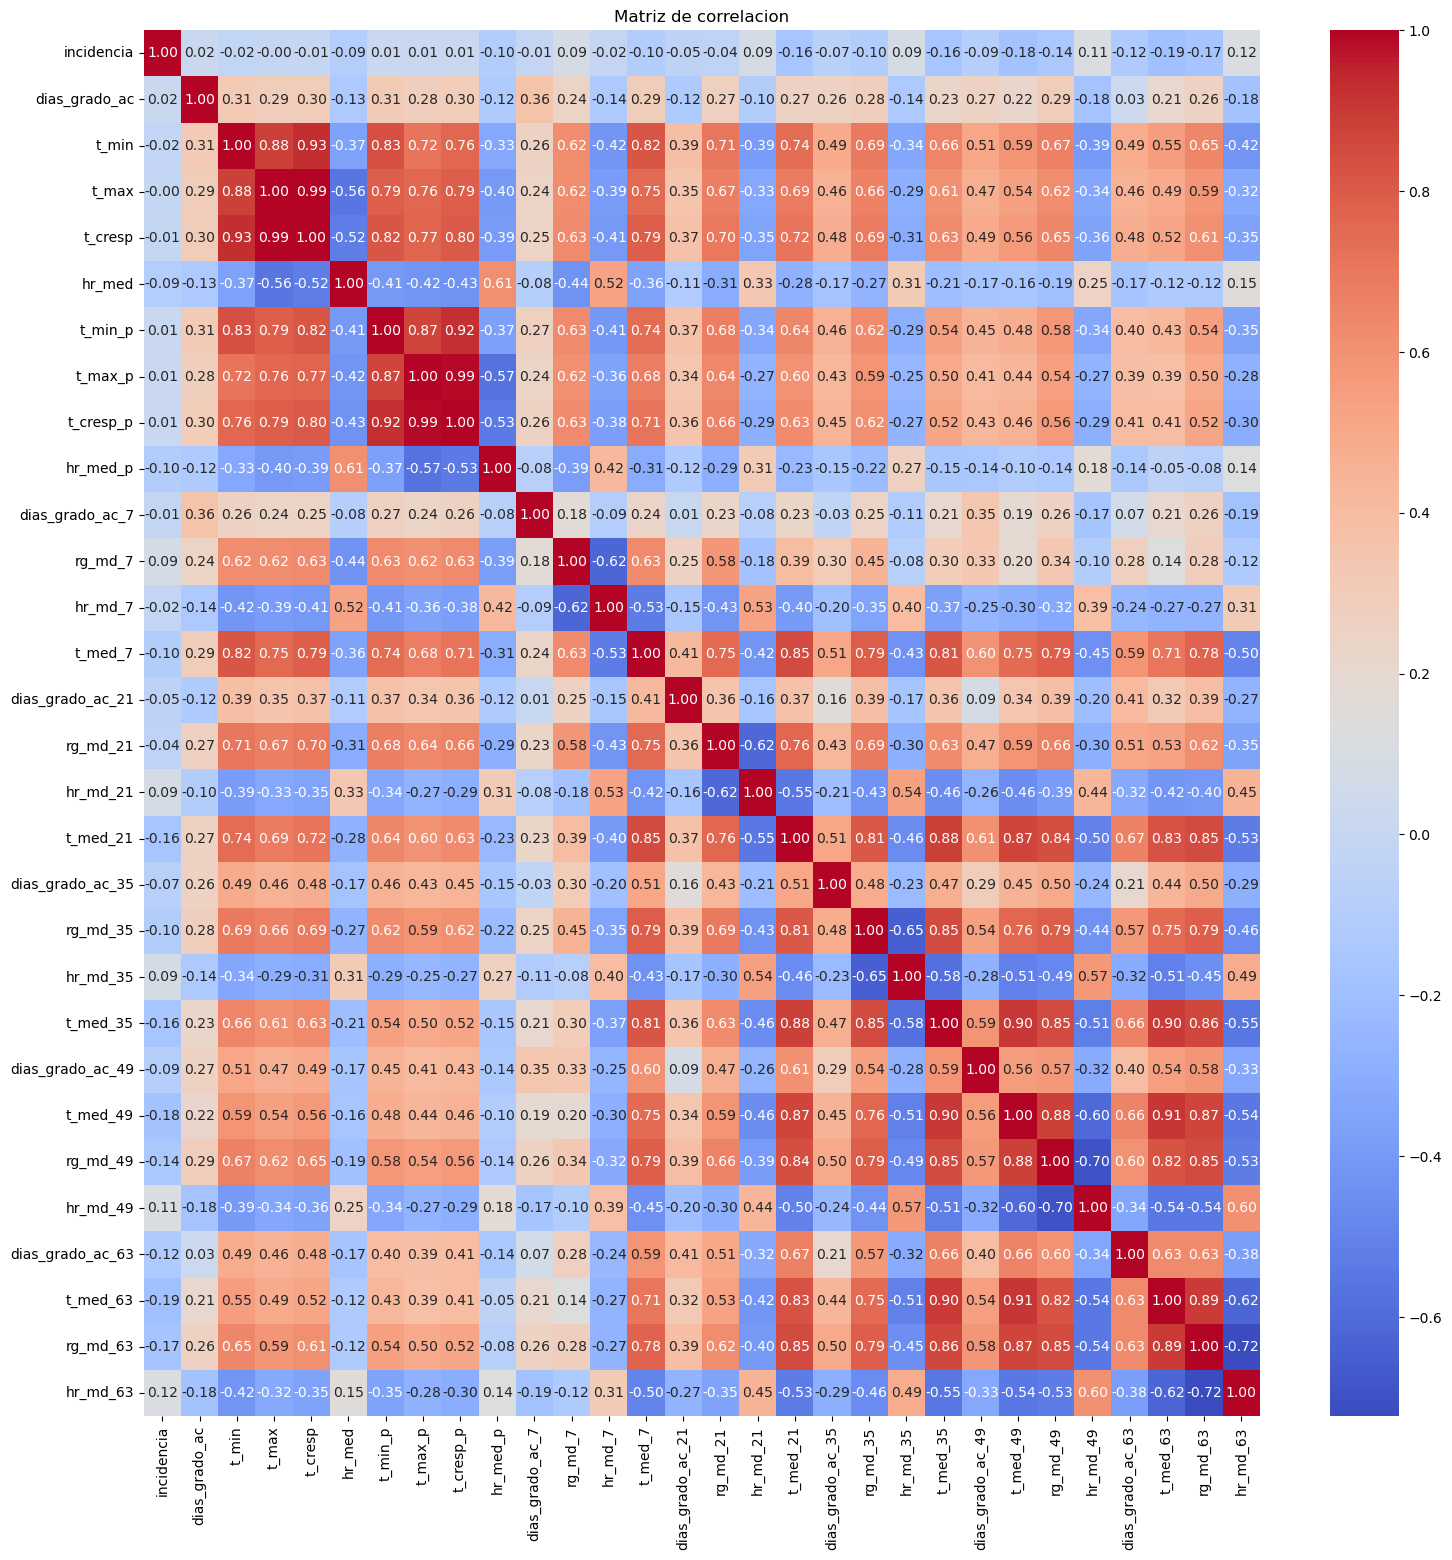

In [3]:
df_corr_matrix = df[['incidencia', 'dias_grado_ac','t_min','t_max','t_cresp','hr_med', \
                         't_min_p','t_max_p','t_cresp_p','hr_med_p', \
                         'dias_grado_ac_7','rg_md_7', 'hr_md_7','t_med_7',\
                         'dias_grado_ac_21','rg_md_21', 'hr_md_21','t_med_21',\
                         'dias_grado_ac_35','rg_md_35', 'hr_md_35','t_med_35',\
                         'dias_grado_ac_49','t_med_49','rg_md_49','hr_md_49', \
                         'dias_grado_ac_63','t_med_63','rg_md_63','hr_md_63']]
corr_matrix = df_corr_matrix.corr()
plt.figure(figsize=(18,18))
sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt = ".2f")
plt.title("Matriz de correlacion")
plt.show()

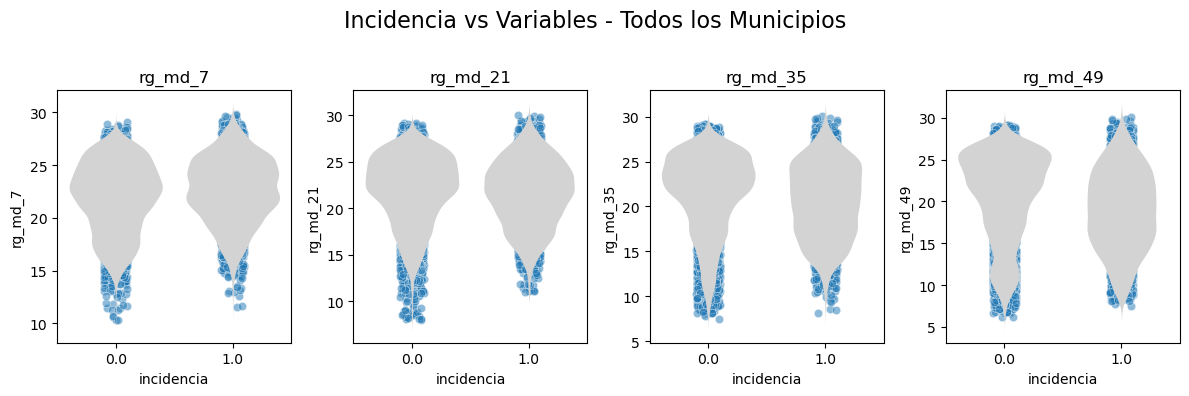

In [4]:
# Crear figura con subgráficos
# Creamos figuras para las radiación acumulada
variables_y=['rg_md_7','rg_md_21','rg_md_35','rg_md_49','rg_md_63']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
fig.suptitle('Incidencia vs Variables - Todos los Municipios', fontsize=16)

for ax, var in zip(axes.flatten(), variables_y):
    # Añadir jittering para evitar solapamiento
    x_jitter = df['incidencia'] + np.random.uniform(-0.1, 0.1, size=len(df))
    sb.scatterplot(x=x_jitter, y=df[var], alpha=0.5, ax=ax)

    # Superponer un violin plot en gris para ver la distribución
    sb.violinplot(x=df['incidencia'], y=df[var], ax=ax, inner=None, color="lightgray", linewidth=0)

    ax.set_title(var)
    ax.set_xlabel("incidencia")
    ax.set_ylabel(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

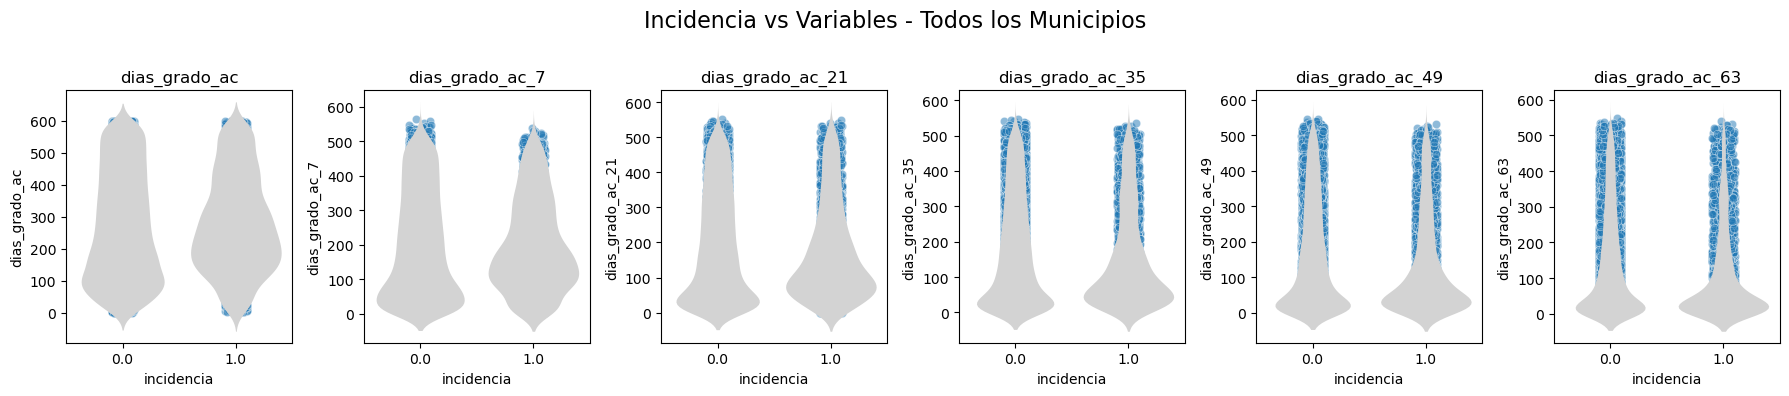

In [5]:
# Crear figura con subgráficos
# Creamos figuras para los días grados por periodo
variables_y=['dias_grado_ac','dias_grado_ac_7','dias_grado_ac_21','dias_grado_ac_35','dias_grado_ac_49','dias_grado_ac_63']
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18, 4))
fig.suptitle('Incidencia vs Variables - Todos los Municipios', fontsize=16)

for ax, var in zip(axes.flatten(), variables_y):
    # Añadir jittering para evitar solapamiento
    x_jitter = df['incidencia'] + np.random.uniform(-0.1, 0.1, size=len(df))
    sb.scatterplot(x=x_jitter, y=df[var], alpha=0.5, ax=ax)

    # Superponer un violin plot en gris para ver la distribución
    sb.violinplot(x=df['incidencia'], y=df[var], ax=ax, inner=None, color="lightgray", linewidth=0)

    ax.set_title(var)
    ax.set_xlabel("incidencia")
    ax.set_ylabel(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

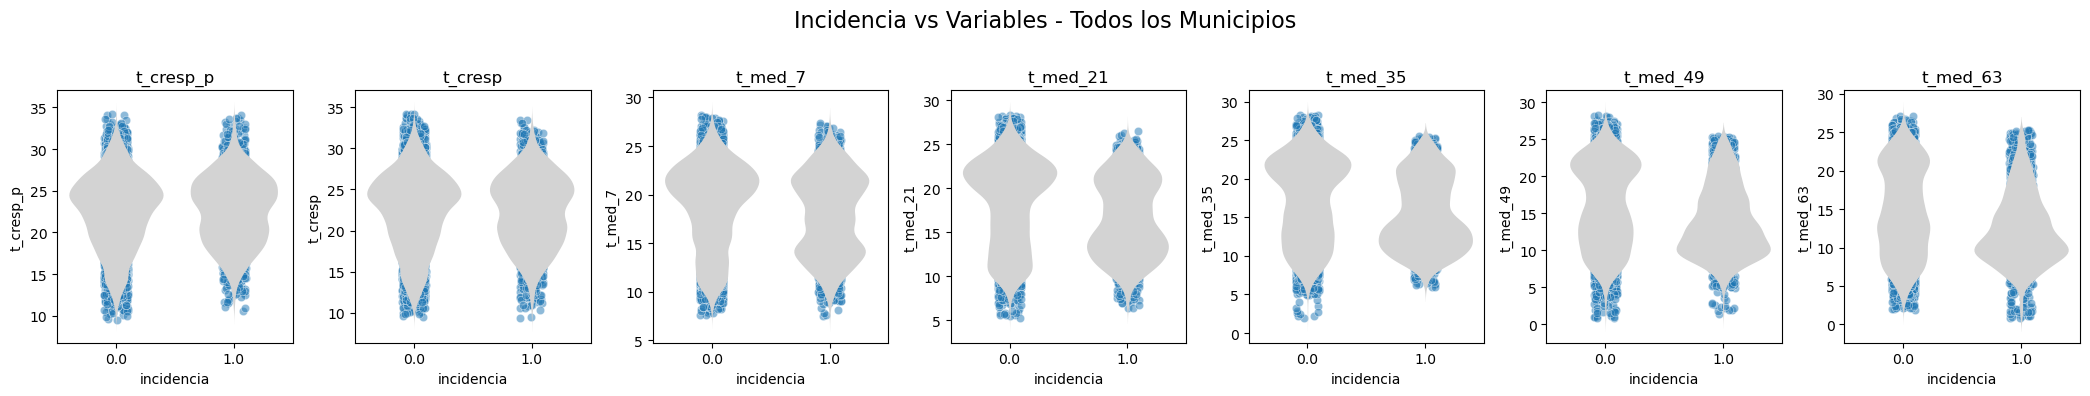

In [6]:
# Crear figura con subgráficos
# Creamos figuras para las temperaturas
variables_y=['t_cresp_p','t_cresp','t_med_7','t_med_21','t_med_35','t_med_49','t_med_63']
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(21, 4))
fig.suptitle('Incidencia vs Variables - Todos los Municipios', fontsize=16)

for ax, var in zip(axes.flatten(), variables_y):
    # Añadir jittering para evitar solapamiento
    x_jitter = df['incidencia'] + np.random.uniform(-0.1, 0.1, size=len(df))
    sb.scatterplot(x=x_jitter, y=df[var], alpha=0.5, ax=ax)

    # Superponer un violin plot en gris para ver la distribución
    sb.violinplot(x=df['incidencia'], y=df[var], ax=ax, inner=None, color="lightgray", linewidth=0)

    ax.set_title(var)
    ax.set_xlabel("incidencia")
    ax.set_ylabel(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

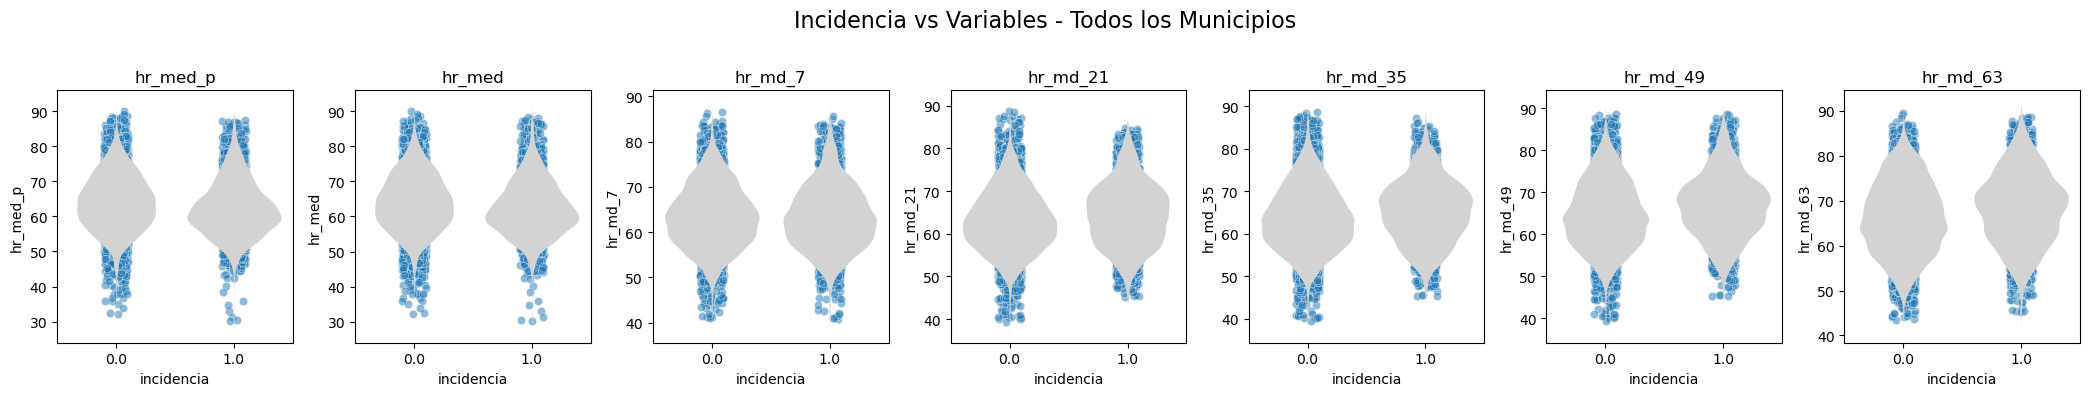

In [7]:
# Crear figura con subgráficos
# Creamos figuras para las humedades relativas
variables_y=['hr_med_p','hr_med','hr_md_7','hr_md_21','hr_md_35','hr_md_49','hr_md_63']
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(21, 4))
fig.suptitle('Incidencia vs Variables - Todos los Municipios', fontsize=16)

for ax, var in zip(axes.flatten(), variables_y):
    # Añadir jittering para evitar solapamiento
    x_jitter = df['incidencia'] + np.random.uniform(-0.1, 0.1, size=len(df))
    sb.scatterplot(x=x_jitter, y=df[var], alpha=0.5, ax=ax)

    # Superponer un violin plot en gris para ver la distribución
    sb.violinplot(x=df['incidencia'], y=df[var], ax=ax, inner=None, color="lightgray", linewidth=0)

    ax.set_title(var)
    ax.set_xlabel("incidencia")
    ax.set_ylabel(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()